In [34]:
import numpy as np
import freud

import matplotlib.pyplot as plt
from matplotlib import patches

In [187]:
box = freud.box.Box.from_box([1, 1, 0, 1, 0, 0])

In [188]:
d = box.xy*.5
corners = [-.5 - d, -.5], [-.5 + d, .5], [.5 + d, .5], [.5 - d, -.5]

In [278]:
points = np.array([[0, -0.05, 0], [0.1, 0.1, 0], [0.15, 0.15, 0], [0.2, 0.2, 0], [0.25, 0.25, 0], [0.3, 0.3, 0], [0.1, 0.3, 0], [0.0, 0.3, 0], [0.08, 0.3, 0], [-0.0, 0.3, 0]])*.5
points[:, :2] -= 0.2

In [279]:
def normal_com(x):
    return np.mean(x[:], axis=0)

(-0.7, 0.7)

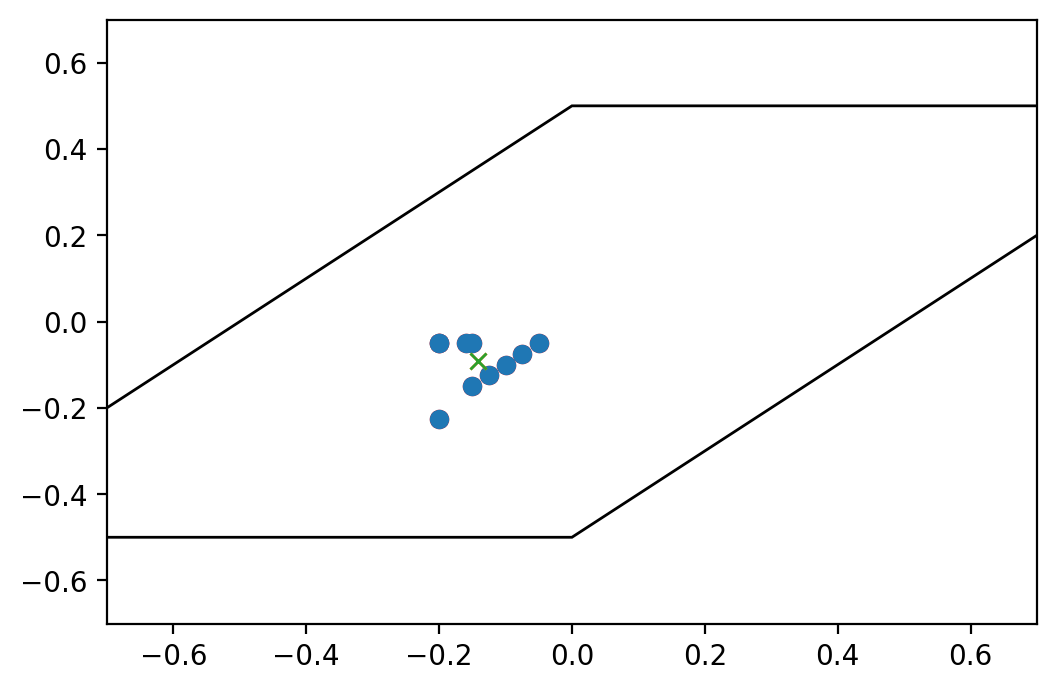

In [280]:
plt.figure(dpi=200)
wrap = box.wrap(points)
plt.plot(wrap[:, 0], wrap[:, 1], 'o', color="red")
plt.plot(points[:, 0], points[:, 1], 'o')
norm_com = normal_com(points)
plt.plot(norm_com[0], norm_com[1], 'x')
wrap_com = normal_com(wrap)
plt.plot(wrap_com[0], wrap_com[1], 'x')
box_corners = np.array(corners)
quad = patches.Polygon(box_corners, closed=True, fill=False)
plt.gca().add_patch(quad)

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)

(-0.1, 1.1)

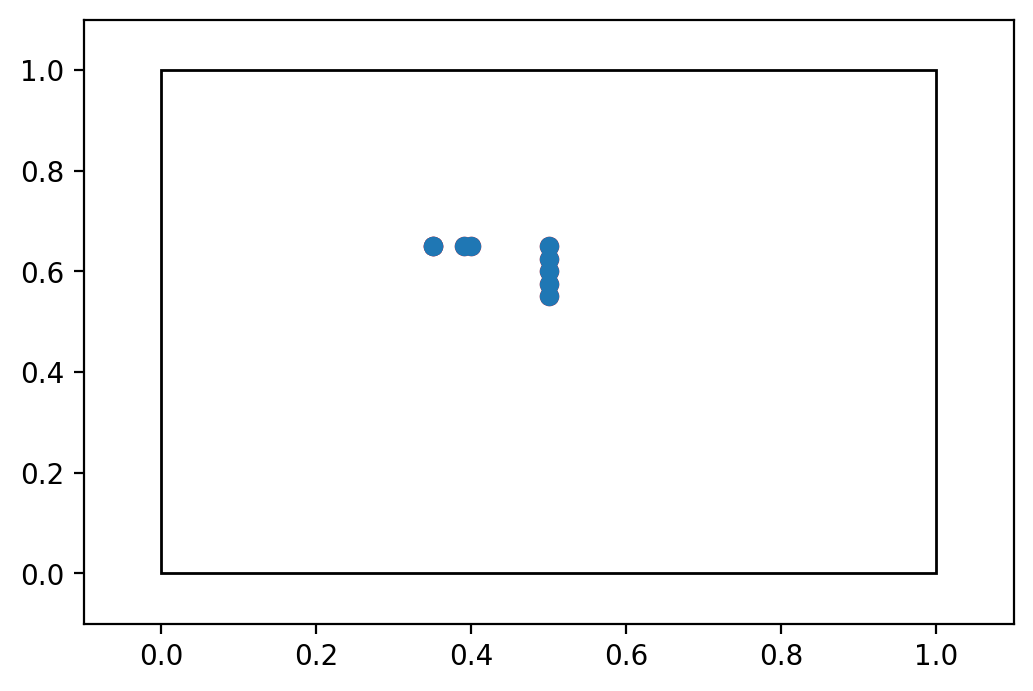

In [270]:
plt.figure(dpi=200)
frac = box.make_fractional(wrap)
plt.plot(frac[:, 0], frac[:, 1], 'o', color="red")

frac = box.make_fractional(points)
plt.plot(frac[:, 0], frac[:, 1], 'o')

box_corners = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])
quad = patches.Polygon(box_corners, closed=True, fill=False)
plt.gca().add_patch(quad)

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

In [190]:
def le_com(x, box):
    wrap = box.wrap(x)
    frac = box.make_fractional(wrap)
    theta = frac * 2 * np.pi

    ce = np.cos(theta)
    xi = np.sin(theta)

    mce = np.mean(ce, axis=0)
    mxi = np.mean(xi, axis=0)

    mtheta = np.arctan2(-mxi, -mce) + np.pi

    xcom = mtheta / (2 * np.pi)

    return box.make_absolute(xcom)    

(-0.6925000000000001, -0.09250000000000008)

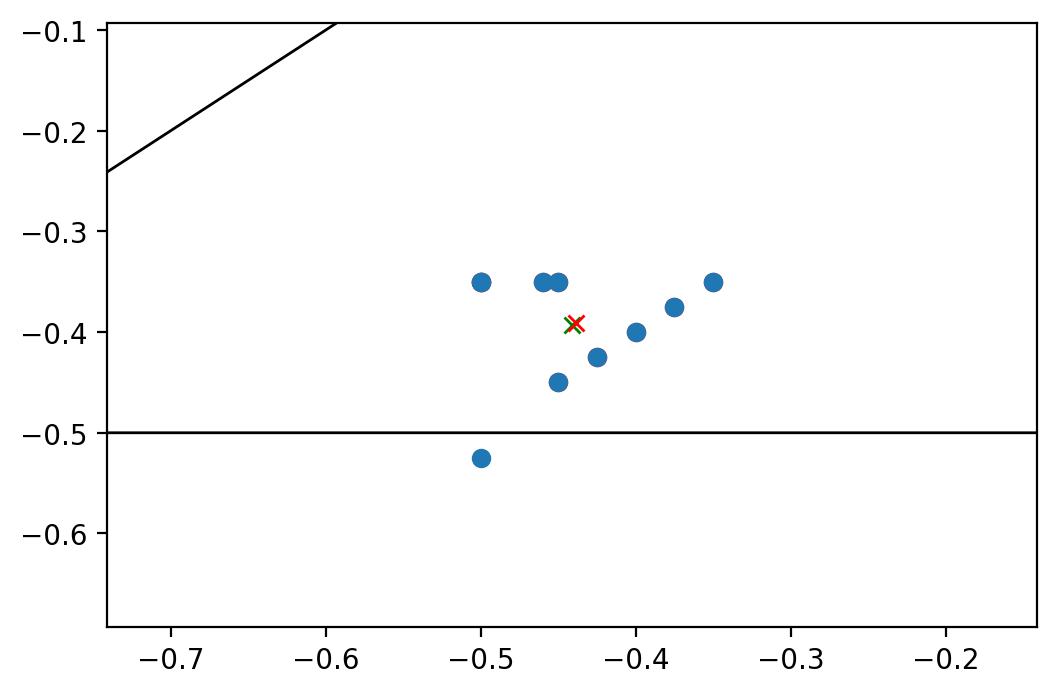

In [301]:
plt.figure(dpi=200)
wrap = box.wrap(points)
plt.plot(wrap[:, 0], wrap[:, 1], 'o', color="red")
plt.plot(points[:, 0], points[:, 1], 'o')
norm_com = normal_com(points)
plt.plot(norm_com[0], norm_com[1], 'x', color="green")
wrap_com = le_com(wrap, box)
plt.plot(wrap_com[0], wrap_com[1], 'x', color="red")
box_corners = np.array(corners)
quad = patches.Polygon(box_corners, closed=True, fill=False)
plt.gca().add_patch(quad)

plt.xlim(-0.3 + norm_com[0], 0.3 + norm_com[0])
plt.ylim(-0.3 + norm_com[1], 0.3 + norm_com[1])

In [284]:
norm_com, wrap_com

(array([-0.441 , -0.3925,  0.    ]),
 array([-0.43849578, -0.39104277,  0.        ], dtype=float32))

(-1.3925, 0.6074999999999999)

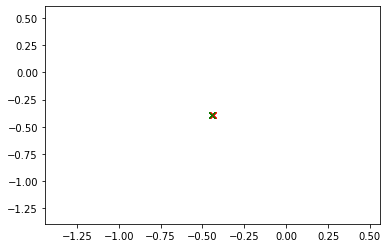

In [285]:
for xy in np.linspace(0, 1, 10):
    box = freud.box.Box.from_box([1, 1, 0, xy, 0, 0])
    d = box.xy*.5
    corners = [-.5 - d, -.5], [-.5 + d, .5], [.5 + d, .5], [.5 - d, -.5]
    wrap = box.wrap(points)
    norm_com = normal_com(points)
    wrap_com = le_com(wrap, box)
    plt.plot(wrap_com[0], wrap_com[1], 'x', color="red")
    plt.plot(norm_com[0], norm_com[1], 'x', color="green")

dx = 1
plt.xlim(norm_com[0] - dx, norm_com[0] + dx)
plt.ylim(norm_com[1] - dx, norm_com[1] + dx)

In [297]:
def le_com_fixed(x, box):
    wrap = box.wrap(x)
    frac = box.make_fractional(wrap)
    theta = frac * 2 * np.pi

    ce = np.cos(theta)
    xi = np.sin(theta)

    mce = np.mean(ce, axis=0)
    mxi = np.mean(xi, axis=0)

    mtheta = np.arctan2(-mxi, -mce) + np.pi

    xcom = mtheta / (2 * np.pi)

    return box.make_absolute(xcom)    

In [298]:
points = np.array([[0, -0.05, 0], [0.1, 0.1, 0], [0.15, 0.15, 0], [0.2, 0.2, 0], [0.25, 0.25, 0], [0.3, 0.3, 0], [0.1, 0.3, 0], [0.0, 0.3, 0], [0.08, 0.3, 0], [-0.0, 0.3, 0]])*.5
points[:, :2] -= 0.5

(-0.8, 0.8)

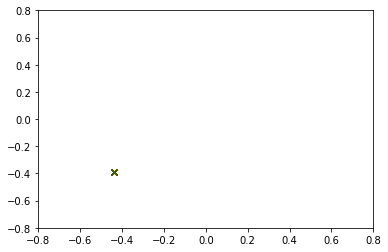

In [299]:
for xy in np.linspace(0, 1, 10):
    box = freud.box.Box.from_box([1, 1, 0, xy, 0, 0])
    d = box.xy*.5
    corners = [-.5 - d, -.5], [-.5 + d, .5], [.5 + d, .5], [.5 - d, -.5]
    wrap = box.wrap(points)
    norm_com = normal_com(points)
    wrap_com = le_com_fixed(wrap, box)
    plt.plot(wrap_com[0], wrap_com[1], 'x', color="red")
    plt.plot(norm_com[0], norm_com[1], 'x', color="green")

# dx = 0.01
# plt.xlim(norm_com[0] - dx, norm_com[0] + dx)
# plt.ylim(norm_com[1] - dx, norm_com[1] + dx);
plt.xlim(-0.8, 0.8)
plt.ylim(-0.8, 0.8)

(-0.4025000000000001, -0.38250000000000006)

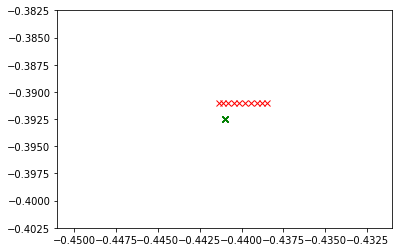

In [300]:
for xy in np.linspace(0, 1, 10):
    box = freud.box.Box.from_box([1, 1, 0, xy, 0, 0])
    d = box.xy*.5
    corners = [-.5 - d, -.5], [-.5 + d, .5], [.5 + d, .5], [.5 - d, -.5]
    wrap = box.wrap(points)
    norm_com = normal_com(points)
    wrap_com = le_com(wrap, box)
    plt.plot(wrap_com[0], wrap_com[1], 'x', color="red")
    plt.plot(norm_com[0], norm_com[1], 'x', color="green")

dx = 0.01
plt.xlim(norm_com[0] - dx, norm_com[0] + dx)
plt.ylim(norm_com[1] - dx, norm_com[1] + dx)